# Q1 : Additional Ques 1

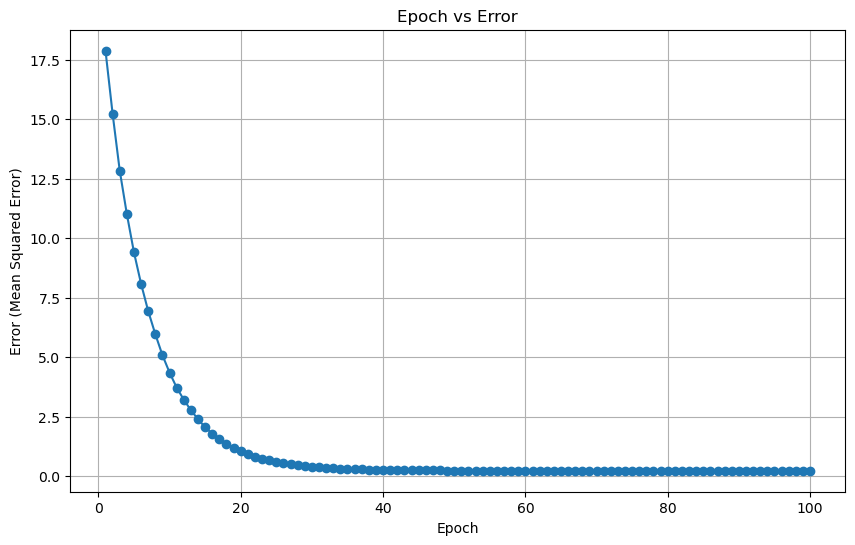

Final Coefficients: [1.52953498]
Intercept: [4.29824249]
Final Error: 0.2337197188428118


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Data
data = pd.read_csv('salary_data.csv')

# Step 2: Prepare the Data
X = data[['experience']].values
y = data['salary'].values

# Optional: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Initialize the Model
# Use the default values for learning rate and number of iterations
model = SGDRegressor(max_iter=1, warm_start=True, tol=None, penalty=None)

# To store the error values
errors = []
iterations = []

# Train the Model
max_epochs = 100  # Set the number of epochs you want to run
for epoch in range(max_epochs):
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    error = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    errors.append(error)
    iterations.append(epoch + 1)  # Epochs start from 1 for plotting

# Step 4: Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Error (Mean Squared Error)')
plt.title('Epoch vs Error')
plt.grid(True)
plt.show()

# Print final coefficients and error
print(f"Final Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Final Error: {errors[-1]}")


# Q2: Additional Ques 2

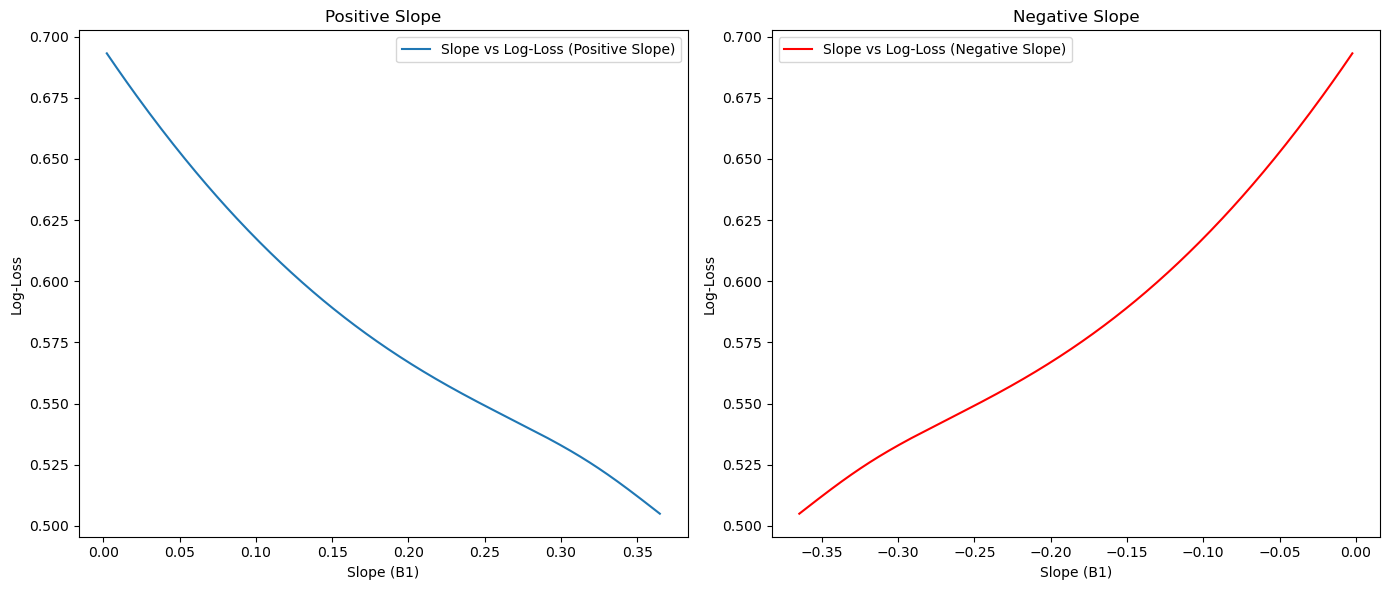

In [5]:
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])


x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])


B0 = 0
B1 = 0
alpha = 0.01

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(x, y, B0, B1, alpha, iterations):
    m = len(y)
    loss_history = []
    B0_history = []
    B1_history = []

    for _ in range(iterations):
        z = B0 + B1 * x
        prediction = sigmoid(z)
        error = y - prediction
            
        # Compute gradients
        gradient_B0 = np.sum(error * prediction * (1 - prediction)) / m
        gradient_B1 = np.sum(error * prediction * (1 - prediction) * x) / m

        # Update coefficients
        B0 += alpha * gradient_B0
        B1 += alpha * gradient_B1

        # Calculate log-loss
        log_loss = -np.mean(y * np.log(prediction + 1e-9) + (1 - y) * np.log(1 - prediction + 1e-9))
        loss_history.append(log_loss)
        B0_history.append(B0)
        B1_history.append(B1)

    return B0_history, B1_history, loss_history

# Parameters
iterations = 1000

# Positive Slope
B0_pos, B1_pos, loss_pos = gradient_descent(x_pos, y_pos, B0, B1, alpha, iterations)

# Negative Slope
B0_neg, B1_neg, loss_neg = gradient_descent(x_neg, y_neg, B0, B1, alpha, iterations)



# Plot for Positive Slope Dataset:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(B1_pos, loss_pos, label='Slope vs Log-Loss (Positive Slope)')
plt.xlabel('Slope (B1)')
plt.ylabel('Log-Loss')
plt.title('Positive Slope')
plt.legend()

# Plot for Negative Slope Dataset
plt.subplot(1, 2, 2)
plt.plot(B1_neg, loss_neg, label='Slope vs Log-Loss (Negative Slope)', color='red')
plt.xlabel('Slope (B1)')
plt.ylabel('Log-Loss')
plt.title('Negative Slope')
plt.legend()

plt.tight_layout()
plt.show()

# Q3

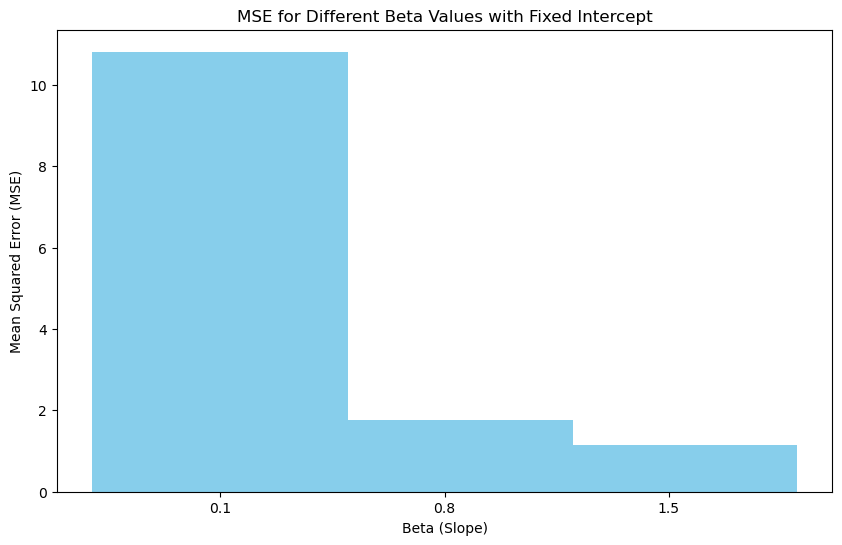

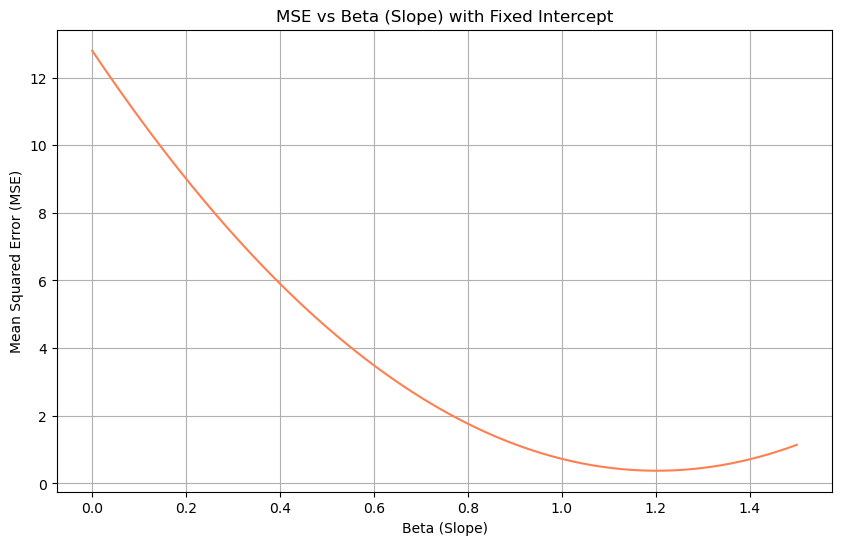

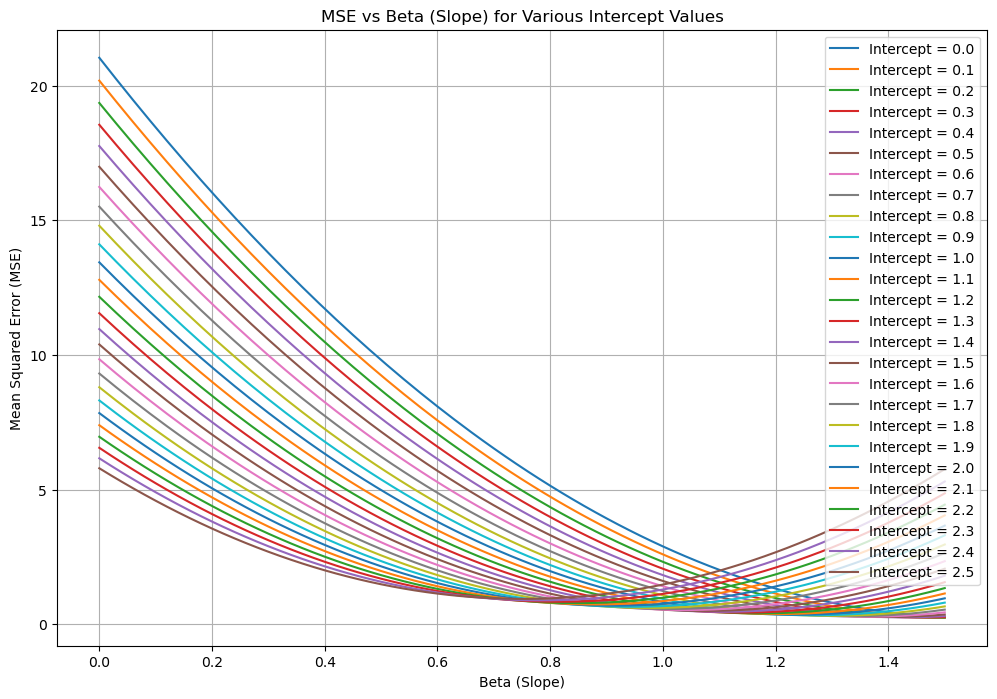

Mean Squared Error using scikit-learn: 0.03


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('salary_data.csv')

# Extract features and target variable
experience = data['experience'].values
salary = data['salary'].values


# a. MSE for Various Values of β with Fixed Intercept:

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fixed intercept
intercept = 1.1
betas = [0.1, 1.5, 0.8]

# Calculate MSE for each beta
mse_list = []
for beta in betas:
    predictions = beta * experience + intercept
    mse = mean_squared_error(salary, predictions)
    mse_list.append(mse)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(betas, mse_list, color='skyblue')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Beta Values with Fixed Intercept')
plt.xticks(betas)
plt.show()


# b. MSE for Beta Values Between 0 and 1.5

# Parameters
beta_range = np.arange(0, 1.51, 0.01)
mse_range = []

# Calculate MSE for each beta in the range
for beta in beta_range:
    predictions = beta * experience + intercept
    mse = mean_squared_error(salary, predictions)
    mse_range.append(mse)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(beta_range, mse_range, color='coral')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Beta (Slope) with Fixed Intercept')
plt.grid(True)
plt.show()


# c. MSE for Different Values of Intercept

# Parameters
intercept_range = np.arange(0, 2.51, 0.1)
beta_range = np.arange(0, 1.51, 0.01)

plt.figure(figsize=(12, 8))

# Calculate MSE for each combination of beta and intercept
for intercept in intercept_range:
    mse_range = []
    for beta in beta_range:
        predictions = beta * experience + intercept
        mse = mean_squared_error(salary, predictions)
        mse_range.append(mse)
    
    plt.plot(beta_range, mse_range, label=f'Intercept = {intercept:.1f}')

plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Beta (Slope) for Various Intercept Values')
plt.legend()
plt.grid(True)
plt.show()


# d. Compare Results Using scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(experience.reshape(-1, 1), salary, test_size=0.2, random_state=42)

# Fit model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and MSE
y_pred = model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred)

# Output
print(f"Mean Squared Error using scikit-learn: {mse_sklearn:.2f}")


# Q4 : Use pass-fail dataset

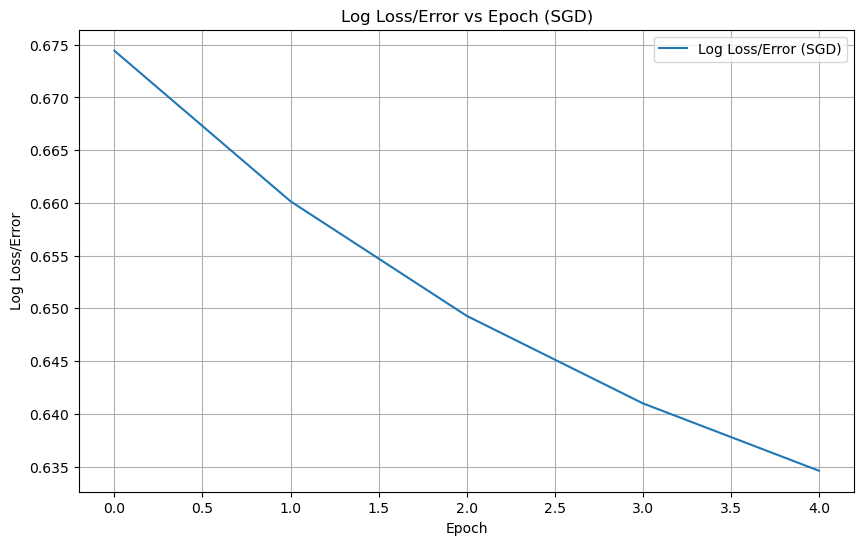

Scikit-learn B0: 0.00
Scikit-learn B1: 0.19
Scikit-learn Log Loss: 0.59


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

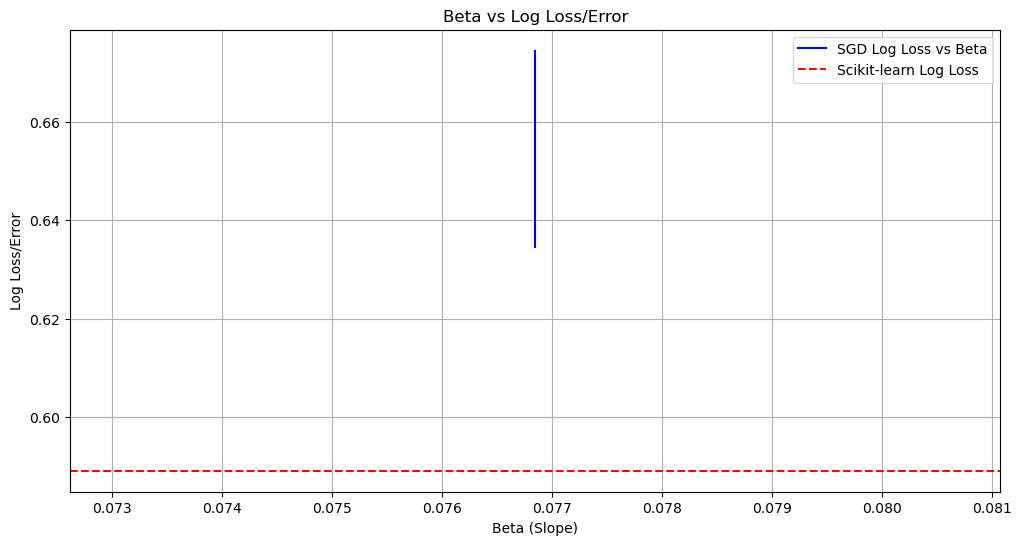

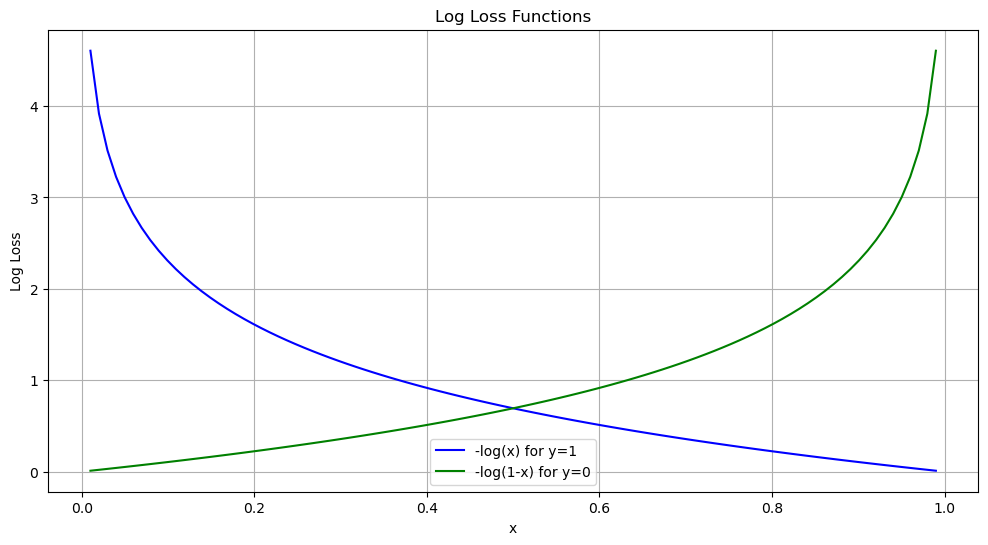

In [12]:
## Implement Stochastic Gradient Descent (SGD) for Logistic Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('pass_fail.csv')

# Separate features and labels
X = data[['hours_of_study']].values
y = data['pass'].values

# Initialize parameters
B0 = 0
B1 = 0
alpha = 0.01
iterations = 60
epochs = 5

# Storage for log loss
log_losses = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i][0]
        yi = y[i]
        
        # Calculate prediction
        z = B0 + B1 * xi
        prediction = 1 / (1 + np.exp(-z))
        
        # Calculate error
        error = yi - prediction
        
        # Update coefficients
        B0 += alpha * error * prediction * (1 - prediction)
        B1 += alpha * error * prediction * (1 - prediction) * xi
    
    # Calculate log loss for this epoch
    predictions = 1 / (1 + np.exp(-(B0 + B1 * X.flatten())))
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    log_loss_value = log_loss(y, predictions)
    log_losses.append(log_loss_value)

# Plot log loss/error versus epoch
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_losses)), log_losses, label='Log Loss/Error (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Epoch (SGD)')
plt.legend()
plt.grid(True)
plt.show()


## Use Scikit-learn for Comparison


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model using scikit-learn
model = LogisticRegression(solver='lbfgs', max_iter=1)  # Single iteration for comparison
for epoch in range(epochs):
    model.fit(X_train, y_train)  # Fit the model
    
    # Get coefficients
    B0_sklearn = model.intercept_[0]
    B1_sklearn = model.coef_[0][0]
    
    # Get predictions and calculate log loss
    predictions_sklearn = model.predict_proba(X_test)[:, 1]
    log_loss_sklearn = log_loss(y_test, predictions_sklearn)
    
print(f"Scikit-learn B0: {B0_sklearn:.2f}")
print(f"Scikit-learn B1: {B1_sklearn:.2f}")
print(f"Scikit-learn Log Loss: {log_loss_sklearn:.2f}")



##  Plot Beta vs Log Loss/Error


# Collect beta values
betas_sgd = [B1 for _ in range(len(log_losses))]  # As beta is constant for SGD in this case
betas_sklearn = [B1_sklearn] * len(log_losses)  # Constant for scikit-learn

# Plot
plt.figure(figsize=(12, 6))

# SGD results
plt.plot(betas_sgd, log_losses, label='SGD Log Loss vs Beta', color='blue')

# Scikit-learn results
plt.axhline(y=log_loss_sklearn, color='red', linestyle='--', label='Scikit-learn Log Loss')

plt.xlabel('Beta (Slope)')
plt.ylabel('Log Loss/Error')
plt.title('Beta vs Log Loss/Error')
plt.legend()
plt.grid(True)
plt.show()

## Plot Log Loss Functions



# Generate values for x
x = np.linspace(0.01, 0.99, 100)

# Log loss functions
log_loss_y1 = -np.log(x)
log_loss_y0 = -np.log(1 - x)

# Plot
plt.figure(figsize=(12, 6))

# Plot for y=1
plt.plot(x, log_loss_y1, label='-log(x) for y=1', color='blue')

# Plot for y=0
plt.plot(x, log_loss_y0, label='-log(1-x) for y=0', color='green')

# Combined graph
plt.xlabel('x')
plt.ylabel('Log Loss')
plt.title('Log Loss Functions')
plt.legend()
plt.grid(True)
plt.show()


# Q5

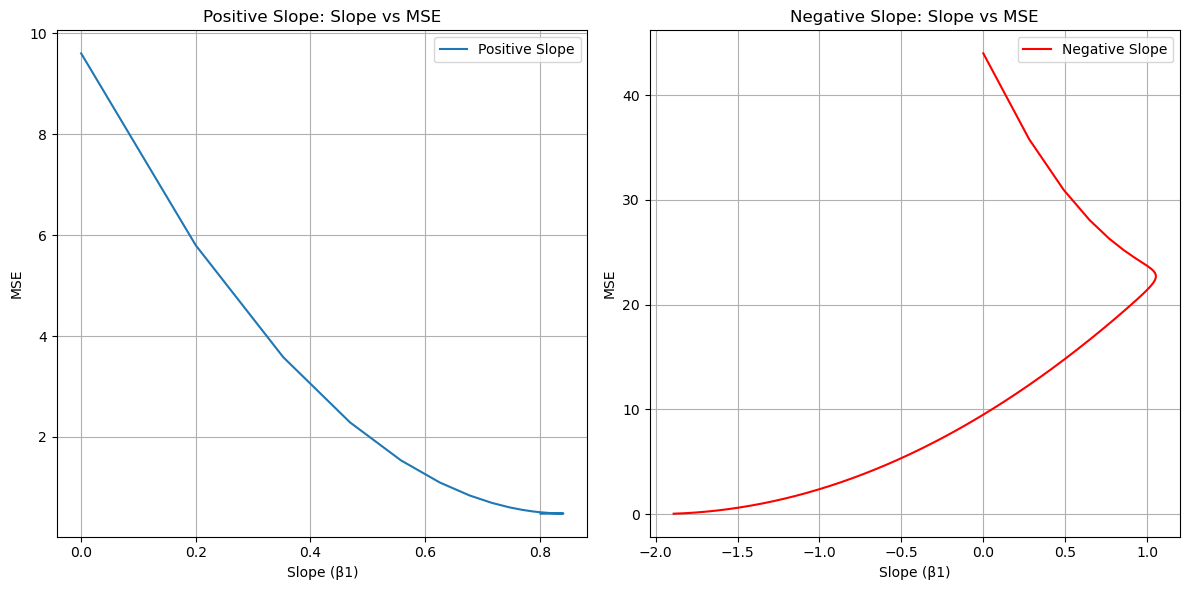

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    # Initialize parameters
    b0 = 0
    b1 = 0
    m = len(x)
    mse_history = []
    slope_history = []
    
    for epoch in range(epochs):
        # Predictions
        predictions = b0 + b1 * x
        
        # Calculate MSE
        errors = y - predictions
        mse = (1 / m) * np.sum(errors ** 2)
        mse_history.append(mse)
        slope_history.append(b1)
        
        # Gradients
        db0 = -(2 / m) * np.sum(errors)
        db1 = -(2 / m) * np.sum(errors * x)
        
        # Update parameters
        b0 -= learning_rate * db0
        b1 -= learning_rate * db1
        
    return b0, b1, mse_history, slope_history

# Positive slope dataset
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

# Negative slope dataset
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

# Perform gradient descent
b0_pos, b1_pos, mse_pos, slope_pos = gradient_descent(x_pos, y_pos)
b0_neg, b1_neg, mse_neg, slope_neg = gradient_descent(x_neg, y_neg)

# Plot MSE vs Slope for positive slope dataset
plt.figure(figsize=(12, 6))

# Plot for positive slope dataset
plt.subplot(1, 2, 1)
plt.plot(slope_pos, mse_pos, label='Positive Slope')
plt.xlabel('Slope (β1)')
plt.ylabel('MSE')
plt.title('Positive Slope: Slope vs MSE')
plt.legend()
plt.grid(True)

# Plot for negative slope dataset
plt.subplot(1, 2, 2)
plt.plot(slope_neg, mse_neg, label='Negative Slope', color='red')
plt.xlabel('Slope (β1)')
plt.ylabel('MSE')
plt.title('Negative Slope: Slope vs MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
